In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid
from numpy import pi
import math


#  Exploring the DFT Matrix vs. Random Matrices

In [2]:
def dft_matrix(N):
    """
    Normalized (unitary) DFT matrix F of size N x N:
      F[m,n] = 1/sqrt(N) * exp(-j*2*pi*m*n/N),  0 <= m,n < N
    """
    m = np.arange(N).reshape((N,1))
    n = np.arange(N).reshape((1,N))
    W = np.exp(-1j * 2.0 * pi * m * n / N) / math.sqrt(N)
    return W

def random_gaussian_matrix(N, seed=None):
    """Real Gaussian random matrix with i.i.d. N(0,1) entries"""
    if seed is not None:
        np.random.seed(seed)
    return np.random.randn(N, N)

def plot_matrix_heatmaps(A, title_prefix="Matrix A", cmap='viridis', figsize=(10,4)):
    """
    Plot real and imaginary parts of a matrix side-by-side.
    """
    fig, axes = plt.subplots(1, 2, figsize=figsize)
    im0 = axes[0].imshow(np.real(A), aspect='auto')
    axes[0].set_title(f"{title_prefix} — real(A)")
    plt.colorbar(im0, ax=axes[0], fraction=0.046, pad=0.04)

    im1 = axes[1].imshow(np.imag(A), aspect='auto')
    axes[1].set_title(f"{title_prefix} — imag(A)")
    plt.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04)
    plt.tight_layout()
    plt.show()

# a) Structure and Visualization

DFT Matrix F16 shape: (16, 16)
Random Matrix R16 shape: (16, 16)


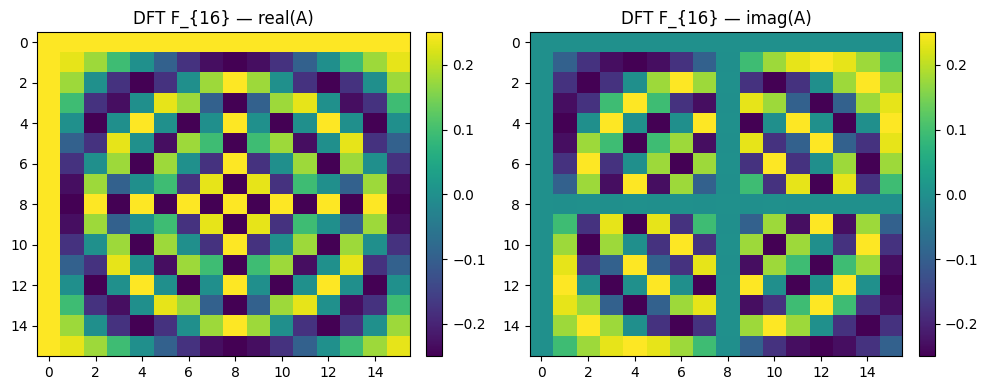

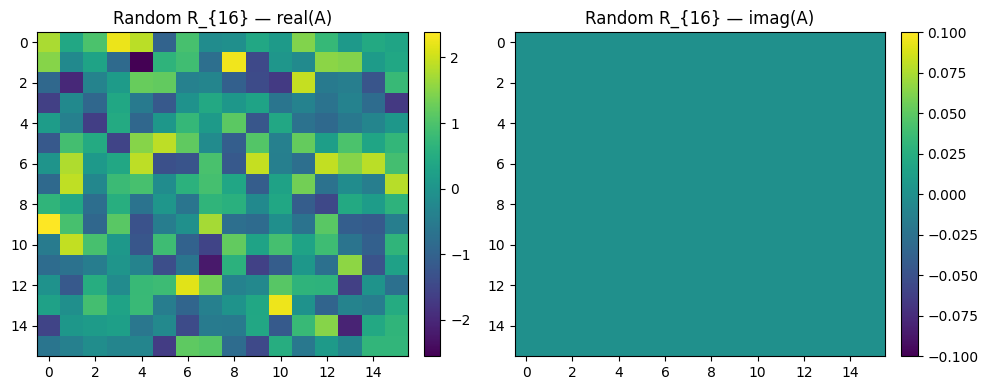

In [4]:
N = 16
F16 = dft_matrix(N)
R16 = random_gaussian_matrix(N, seed=0)

print("DFT Matrix F16 shape:", F16.shape)
print("Random Matrix R16 shape:", R16.shape)

# Visualize
plot_matrix_heatmaps(F16, title_prefix="DFT F_{16}")
plot_matrix_heatmaps(R16, title_prefix="Random R_{16}")



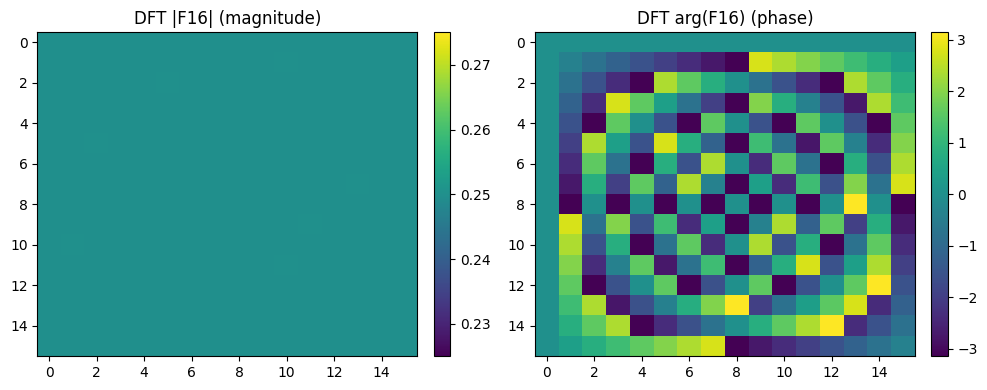

In [6]:
#Extra plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(np.abs(F16), aspect='auto')
plt.title("DFT |F16| (magnitude)")
plt.colorbar(fraction=0.046, pad=0.04)
plt.subplot(1,2,2)
plt.imshow(np.angle(F16), aspect='auto')
plt.title("DFT arg(F16) (phase)")
plt.colorbar(fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

### Q) Comment on differences in structure (DFT vs Random): symmetry, periodicity, and patterns.



- **DFT matrix (F)**  
  - Strong structured patterns in both real and imaginary parts.  
  - Shows clear periodicity: rows/columns form sinusoidal patterns (cosine in real part, sine in imaginary part).  
  - Exhibits symmetry and conjugate relationships across rows and columns.  
  - All entries have equal magnitude, only phases vary.

- **Random matrix (R)**  
  - Appears noisy, no periodicity or visible structure.  
  - No symmetry or repeating patterns.  
  - Entry magnitudes vary randomly, unlike the uniform DFT case.


# b) Orthogonality and Energy Preservation

Max deviation from identity for F^* F (N=16): 2.150e-15
Is the DFT matrix F unitary (close to identity)? True


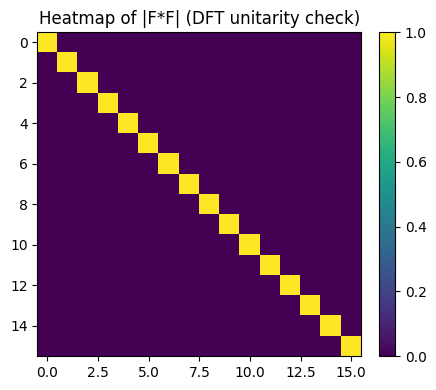

In [7]:
# Verifying F* F = I
FHF = F16.conj().T @ F16
I16 = np.eye(N, dtype=np.complex128)
max_dev = np.max(np.abs(FHF - I16))
print(f"Max deviation from identity for F^* F (N={N}): {max_dev:.3e}")
print("Is the DFT matrix F unitary (close to identity)?", np.allclose(FHF, I16, atol=1e-12))

plt.figure(figsize=(5,4))
plt.imshow(np.abs(FHF), cmap='viridis')
plt.title("Heatmap of |F*F| (DFT unitarity check)")
plt.colorbar(fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

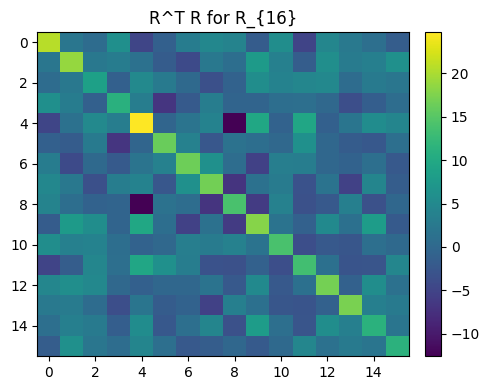

Eigenvalues of R^T R (first 8): [50.524489   39.34976677 32.5924066  26.54145548 21.39387013 20.74567025
 18.02604909 14.94534937]
Mean diagonal(R^T R) ~ 15.624539404375696
Frobenius norm of (R^T R - I): 83.76500059490262
(R^T R) does NOT approximate identity as clearly seen from above.


In [8]:
RTR = R16.T @ R16
#heatmap of R^T R
plt.figure(figsize=(5,4))
plt.imshow(RTR, aspect='auto')
plt.title("R^T R for R_{16}")
plt.colorbar(fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

# Some statistics for R^T R compared to identity
eigvals_RTR = np.linalg.eigvals(RTR)
print("Eigenvalues of R^T R (first 8):", np.real(eigvals_RTR)[:8])
print("Mean diagonal(R^T R) ~", np.mean(np.diag(RTR)))
print("Frobenius norm of (R^T R - I):", np.linalg.norm(RTR - np.eye(N)))

print("(R^T R) does NOT approximate identity as clearly seen from above.")

### Q) Why unitarity matters in signal processing?

- A unitary matrix, like the normalized DFT matrix, has rows and columns that form an orthonormal basis.  
- This guarantees that the overall energy of a signal is preserved when transformed, i.e. the DFT does not amplify or attenuate the signal.  
- Parseval’s theorem states that the signal’s total energy remains the same in both the time domain and the frequency domain.  
- As a result, the DFT provides a stable and lossless way of analyzing signals.  
- Without unitarity, a transform could distort energy, leading to unreliable spectral representations.  
- Such distortions would be problematic in applications like compression, filtering, and communications.


# c) Condition number exploration


Condition numbers (2-norm):
N= 2  kappa(F_N)=1.000e+00   kappa(R_N) mean=1.025e+01 ± 1.735e+01
N= 4  kappa(F_N)=1.000e+00   kappa(R_N) mean=3.317e+01 ± 4.198e+01
N= 8  kappa(F_N)=1.000e+00   kappa(R_N) mean=3.465e+01 ± 6.304e+01
N=16  kappa(F_N)=1.000e+00   kappa(R_N) mean=6.747e+01 ± 5.393e+01
N=32  kappa(F_N)=1.000e+00   kappa(R_N) mean=1.485e+02 ± 1.473e+02
N=64  kappa(F_N)=1.000e+00   kappa(R_N) mean=6.173e+02 ± 4.895e+02


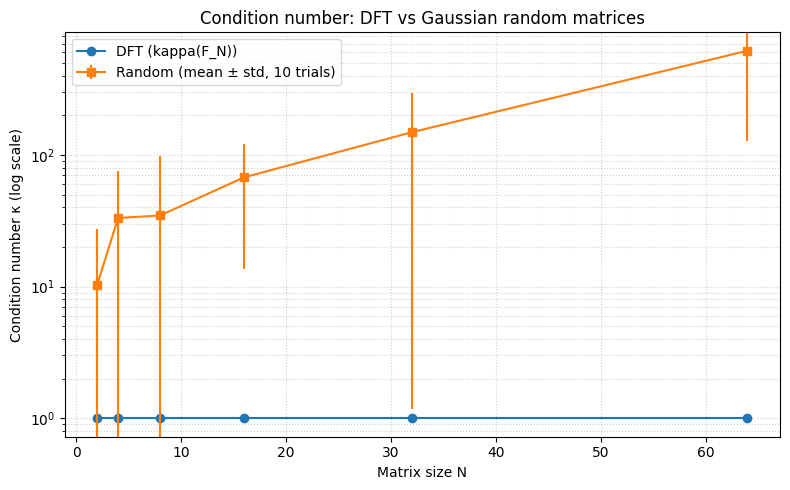

In [11]:

Ns = [2, 4, 8, 16, 32, 64]
kappa_F = []
kappa_R_mean = []
kappa_R_std = []
num_random_trials = 10

for N in Ns:
    F = dft_matrix(N)
    k_F = np.linalg.cond(F)
    kappa_F.append(k_F)


    krs = []
    for trial in range(num_random_trials):
        R = random_gaussian_matrix(N)
        k_R = np.linalg.cond(R)
        krs.append(k_R)
    krs = np.array(krs)
    kappa_R_mean.append(np.mean(krs))
    kappa_R_std.append(np.std(krs))


print("\nCondition numbers (2-norm):")
for i, N in enumerate(Ns):
    print(f"N={N:2d}  kappa(F_N)={kappa_F[i]:.3e}   kappa(R_N) mean={kappa_R_mean[i]:.3e} ± {kappa_R_std[i]:.3e}")


plt.figure(figsize=(8,5))
plt.semilogy(Ns, kappa_F, '-o', label='DFT (kappa(F_N))')
plt.errorbar(Ns, kappa_R_mean, yerr=kappa_R_std, fmt='-s', label=f'Random (mean ± std, {num_random_trials} trials)')
plt.xlabel('Matrix size N')
plt.ylabel('Condition number κ (log scale)')
plt.title('Condition number: DFT vs Gaussian random matrices')
plt.grid(True, which='both', ls=':', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

### Q) Why is the DFT always well-conditioned (κ(FN) = 1 theoretically for a unitary DFT)?

The DFT matrix is unitary, so all of its singular values are exactly 1. Since the condition number is the ratio of the largest to the smallest singular value, κ(FN) = 1. So, the DFT is perfectly well-conditioned and does not distort vector norms.

### Q) Why do random matrices’ condition numbers vary and typically grow with N?

Random Gaussian matrices do not have orthonormal columns, so their singular values spread out. As N increases, the chance of very small singular values grows, which increases the ratio between largest and smallest singular values. This leads to larger and more variable condition numbers.

###Q) Discuss implications for numerical stability in solving linear systems or inverting transforms.

A condition number close to 1 ensures stable inversion and minimal amplification of numerical errors. Since the DFT is unitary, inverting it or using it in computations is stable. Random matrices with high condition numbers, however, can amplify small perturbations in data or rounding errors, making linear system solutions unreliable.

###BONUS Q) Where might random matrices still be useful (hint: compressed sensing, random projections)?

Random matrices are extremely useful in modern signal processing and data science because of their statistical properties.

In compressed sensing, random measurement matrices (often Gaussian or Bernoulli) are used to acquire sparse signals with far fewer samples than traditional Nyquist sampling would require. The randomness ensures that, with high probability, the measurements capture enough independent information about the signal for accurate reconstruction using sparse recovery algorithms.

They are also important in random projections for dimensionality reduction. By multiplying high-dimensional data with a suitably scaled random matrix, we can project it into a lower-dimensional space while approximately preserving pairwise distances between points (Johnson–Lindenstrauss lemma). This makes random matrices valuable in machine learning, large-scale optimization, and information retrieval, where working in lower dimensions saves both storage and computation without severely distorting the data geometry.